In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
nb = pd.read_csv('label_game_data.csv')

In [35]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13357 entries, 0 to 13356
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   QueryName                    13356 non-null  object 
 1   ReleaseDate                  13357 non-null  object 
 2   RequiredAge                  13357 non-null  int64  
 3   DeveloperCount               13357 non-null  int64  
 4   DLCCount                     13357 non-null  int64  
 5   Metacritic                   13357 non-null  int64  
 6   RecommendationCount          13357 non-null  int64  
 7   PublisherCount               13357 non-null  int64  
 8   ScreenshotCount              13357 non-null  int64  
 9   SteamSpyOwners               13357 non-null  int64  
 10  SteamSpyPlayersEstimate      13357 non-null  int64  
 11  AchievementCount             13357 non-null  int64  
 12  AchievementHighlightedCount  13357 non-null  int64  
 13  ControllerSuppor

In [36]:
columns = ["PriceCurrency","PriceInitial","PriceFinal"]

nb = nb.drop(columns, axis=1)
nb

,QueryName,ReleaseDate,RequiredAge,DeveloperCount,DLCCount,Metacritic,RecommendationCount,PublisherCount,ScreenshotCount,SteamSpyOwners,...,ControllerSupport,IsFree,FreeVerAvail,PurchaseAvail,SubscriptionAvail,SupportedLanguages,Platforms,Categories,Genres,Recommended
0,Counter-Strike,Nov 1 2000,0,1,0,88,68991,1,13,13033334,...,0,0,0,1,0,English French German Italian Spanish Simplifi...,"Windows, Linux, Mac",Multiplayer,Action,1
1,Team Fortress Classic,Apr 1 1999,0,1,0,0,2439,1,5,5399140,...,0,0,0,1,0,English French German Italian Spanish,"Windows, Linux, Mac",Multiplayer,Action,1
2,Day of Defeat,May 1 2003,0,1,0,79,2319,1,5,7621102,...,0,0,0,1,0,English French German Italian Spanish,"Windows, Linux, Mac",Multiplayer,Action,1
3,Deathmatch Classic,Jun 1 2001,0,1,0,0,888,1,4,7498965,...,0,0,0,1,0,English French German Italian Spanish,"Windows, Linux, Mac",Multiplayer,Action,0
4,Half-Life: Opposing Force,Nov 1 1999,0,1,0,0,2934,1,5,5399499,...,0,0,0,1,0,English French German Korean,"Windows, Linux, Mac","SinglePlayer, Multiplayer",Action,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13352,Baseball Riot,Jan 17 2017,0,1,0,0,0,1,8,0,...,1,0,0,0,0,English**languages with full audio support,Windows,SinglePlayer,"Indie, Casual, Sports",0
13353,Passage 4,Dec 13 2016,0,1,0,0,0,1,10,0,...,0,0,0,0,0,English* French Italian German* Spanish Dutch*...,Windows,SinglePlayer,"Indie, Casual",0
13354,Piximalism,Sep 26 2019,0,1,0,0,0,1,5,0,...,0,0,0,0,0,English,Windows,SinglePlayer,"Indie, Action, Adventure, Casual",0
13355,Technoball,Dec 12 2016,0,1,0,0,0,1,9,0,...,0,0,0,0,0,English**languages with full audio support,Windows,"SinglePlayer, Multiplayer, Coop","Indie, Action, Casual, Sports",0


In [37]:
nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13357 entries, 0 to 13356
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   QueryName                    13356 non-null  object
 1   ReleaseDate                  13357 non-null  object
 2   RequiredAge                  13357 non-null  int64 
 3   DeveloperCount               13357 non-null  int64 
 4   DLCCount                     13357 non-null  int64 
 5   Metacritic                   13357 non-null  int64 
 6   RecommendationCount          13357 non-null  int64 
 7   PublisherCount               13357 non-null  int64 
 8   ScreenshotCount              13357 non-null  int64 
 9   SteamSpyOwners               13357 non-null  int64 
 10  SteamSpyPlayersEstimate      13357 non-null  int64 
 11  AchievementCount             13357 non-null  int64 
 12  AchievementHighlightedCount  13357 non-null  int64 
 13  ControllerSupport            13

In [38]:
import pandas as pd

columns_to_convert = ['SupportedLanguages', 'Platforms', 
                      'Categories', 'Genres', 'Recommended']

nb[columns_to_convert] = nb[columns_to_convert].astype('category')

print(nb.dtypes)

QueryName                        object
ReleaseDate                      object
RequiredAge                       int64
DeveloperCount                    int64
DLCCount                          int64
Metacritic                        int64
RecommendationCount               int64
PublisherCount                    int64
ScreenshotCount                   int64
SteamSpyOwners                    int64
SteamSpyPlayersEstimate           int64
AchievementCount                  int64
AchievementHighlightedCount       int64
ControllerSupport                 int64
IsFree                            int64
FreeVerAvail                      int64
PurchaseAvail                     int64
SubscriptionAvail                 int64
SupportedLanguages             category
Platforms                      category
Categories                     category
Genres                         category
Recommended                    category
dtype: object


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score


label_encoder = LabelEncoder()
nb['Categories'] = label_encoder.fit_transform(nb['Categories'])
nb['Genres'] = label_encoder.fit_transform(nb['Genres'])
nb['Platforms'] = label_encoder.fit_transform(nb['Platforms'])

X = nb[['Genres', 'Categories','Platforms','Metacritic','SteamSpyOwners','SteamSpyPlayersEstimate', 'RecommendationCount']]
y = nb['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8697604790419161
Precision: 0.4480796586059744
Recall: 0.7015590200445434
F1-score: 0.546875


In [40]:
X_train

,Genres,Categories,Platforms,Metacritic,SteamSpyOwners,SteamSpyPlayersEstimate,RecommendationCount
11219,666,76,2,0,0,0,0
5261,220,9,3,0,47169,22777,0
12513,313,32,2,0,7891,4484,0
4459,515,40,4,0,32104,13631,0
4963,479,32,4,0,47707,37663,551
...,...,...,...,...,...,...,...
11964,308,32,2,0,10044,6815,0
5191,219,32,4,0,32283,21701,235
5390,260,32,2,0,203024,137202,704
860,173,32,2,0,1614,897,0


In [41]:
X_test

,Genres,Categories,Platforms,Metacritic,SteamSpyOwners,SteamSpyPlayersEstimate,RecommendationCount
1783,633,62,2,0,3133058,1212224,5750
7596,313,32,5,0,9685,1076,0
5964,0,32,5,0,59365,5560,0
1978,402,13,4,74,3102568,2548199,48918
1085,641,9,2,0,153344,42327,0
...,...,...,...,...,...,...,...
2676,637,46,2,76,17935,12734,326
4833,220,46,4,0,18832,3228,0
9338,0,46,2,0,14169,12734,221
8576,93,9,2,0,717,811,0


In [42]:
from sklearn.metrics import confusion_matrix

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3171  388]
 [ 134  315]]


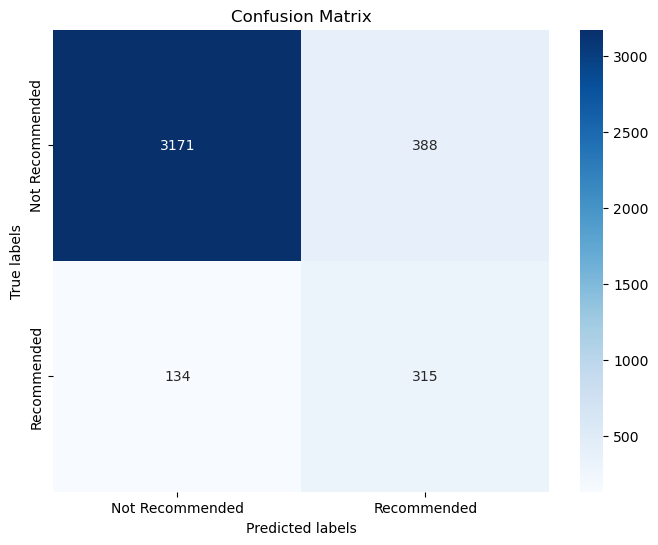

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Not Recommended', 'Recommended'], 
            yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [44]:
import pandas as pd
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score


Xb = nb[['IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail']]
yb = nb['Recommended']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=1)

model = BernoulliNB()
model.fit(Xb_train, yb_train)

yb_pred = model.predict(Xb_test)

accuracyyb = accuracy_score(yb_test, yb_pred)

print("Accuracy:", accuracyyb)

Accuracy: 0.8852295409181636


In [45]:
Xb_train

,IsFree,FreeVerAvail,PurchaseAvail,SubscriptionAvail
7487,1,0,0,0
7957,0,0,1,0
4337,0,0,1,0
1532,0,0,1,0
2929,0,0,1,0
...,...,...,...,...
905,0,0,1,0
5192,0,0,1,0
12172,0,0,1,0
235,0,0,1,0


In [46]:
Xb_test

,IsFree,FreeVerAvail,PurchaseAvail,SubscriptionAvail
6218,0,0,1,0
3639,0,0,1,0
11757,0,0,0,0
6945,1,0,0,0
2419,0,0,1,0
...,...,...,...,...
2333,0,0,1,0
5680,0,0,1,0
5823,0,0,1,0
3925,0,0,1,0


In [47]:
from sklearn.metrics import confusion_matrix

model.fit(Xb_train, yb_train)

yb_pred = model.predict(Xb_test)

confusion_matrix = confusion_matrix(yb_test, yb_pred)
print(confusion_matrix)

[[3548    0]
 [ 460    0]]


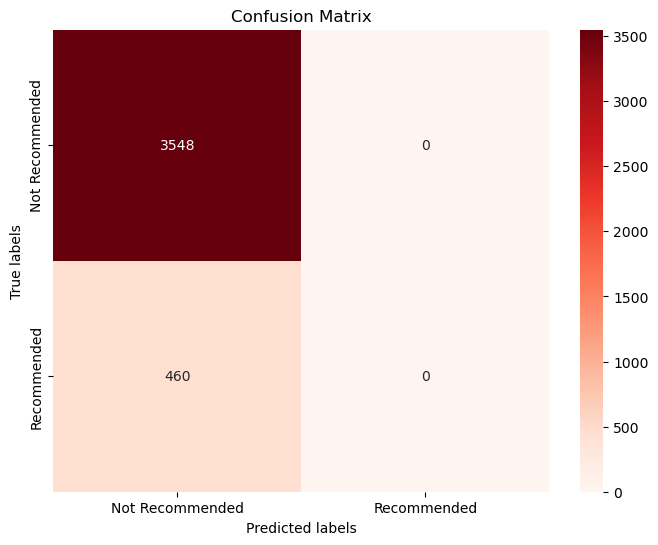

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Reds', fmt='g', 
            xticklabels=['Not Recommended', 'Recommended'], 
            yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()